# TP Bi-Partite Graph Edit Distance

## 1) Costs Matrices :

We will use the toy problem again to test the implementations of the different functions.

In [9]:
from GED_lib import graph_loader,path_Dijkstra,draw_pair_graph,make_pair_tree,draw_tree,draw_path
import networkx as nx
import numpy as np
%matplotlib inline

In [10]:
g1_toy = nx.Graph()
g1_toy.add_node(0,node_label = "O")
g1_toy.add_node(1,node_label = "C")
g1_toy.add_node(2,node_label = "O")
g1_toy.add_node(3,node_label = "N")
g1_toy.add_edge(0,1,edge_label = 1)
g1_toy.add_edge(1,2,edge_label = 1)
g1_toy.add_edge(2,3,edge_label = 1)
g1_toy.add_edge(3,1,edge_label = 1)

g2_toy = nx.Graph()
g2_toy.add_node(0,node_label = "N")
g2_toy.add_node(1,node_label = "C")
g2_toy.add_node(2,node_label = "C")
g2_toy.add_edge(0,1,edge_label = 1)
g2_toy.add_edge(1,2,edge_label = 1)

In [18]:
len(g1_toy.nodes()),len(g2_toy.nodes())

(4, 3)

(<AxesSubplot:>, <AxesSubplot:>)

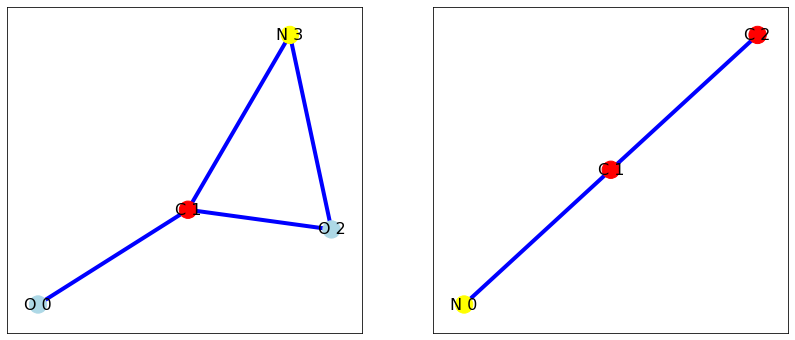

In [5]:
draw_pair_graph(g1_toy,g2_toy)

Here the 3 sets of costs of edits operations are define as follow :

In [11]:
cost1 = {'n_ins':4,'n_sub':2,'n_del':4,'e_ins':1,'e_sub':1,'e_del':1}
cost2 = {'n_ins':4,'n_sub':2,'n_del':4,'e_ins':2,'e_sub':1,'e_del':2}

### a) The C Matrix :

Implement a function that returns the cost matrix $\textbf{C}$ of size (N1+N2,N1+N2), where N1 and N2 are the number of nodes in G1 and G2 respectively.

$$
\textbf{C}_{G_1,G_2}= (c_{i,j}) = \left\{
    \begin{array}{ll}
        cost_{n\_sub(i,j)}  \text{ if } i \leq N_1 \text{ and } j \leq N_2 \\
        cost_{n\_del(i)}  \text{ if } i \leq N_1 \text{ and } j = N_2+i \\
        cost_{n\_ins(j)}  \text{ if } j \leq N_2 \text{ and } i = N_1+j \\
        0 \text{ if } i > N_1 \text{ and } j > N_2 \\
        \infty \text{ otherwise.}
    \end{array}
\right.
$$

An example of output for the toy problem with cost1 (the infinite values are replaced by 100):


    [[  2.,   2.,   2.,   4., 100., 100., 100.],
    [  2.,   0.,   0., 100.,   4., 100., 100.],
    [  2.,   2.,   2., 100., 100.,   4., 100.],
    [  0.,   2.,   2., 100., 100., 100.,   4.],
    [  4., 100., 100.,   0.,   0.,   0.,   0.],
    [100.,   4., 100.,   0.,   0.,   0.,   0.],
    [100., 100.,   4.,   0.,   0.,   0.,   0.]]

In [ ]:
def cost_matrix_c(g1,g2,cost):
    inf_value = 100
    
    N1, N2 = (len(g1.nodes()), len(g2.nodes()))
    size = N1 + N2
    c = np.full((size, size), inf_value)
    print(c, c.shape)
    
    labels1 = nx.get_node_attributes(g1, 'node_label')
    labels2 = nx.get_node_attributes(g2, 'node_label')
    
    print(labels1, labels2)
    for i in range(N1):
        for j in range(N2):
            if labels1[i] == labels2[j]:
                c[i][j] = 0
            else:
                c[i][j] = cost['n_sub']
    
    
    for i in range(N1):
        c[i][N2 + i] = cost['n_del']
    
    for j in range(N2):
        c[N1 + j, j] = cost['n_ins']
        
    for i in range(N1, size):
        for j in range(N2, size):
            c[i][j] = 0

    print(c)




In [27]:
cost_matrix_c(g1_toy,g2_toy,cost1)

[[100 100 100 100 100 100 100]
 [100 100 100 100 100 100 100]
 [100 100 100 100 100 100 100]
 [100 100 100 100 100 100 100]
 [100 100 100 100 100 100 100]
 [100 100 100 100 100 100 100]
 [100 100 100 100 100 100 100]] (7, 7)
{0: 'O', 1: 'C', 2: 'O', 3: 'N'} {0: 'N', 1: 'C', 2: 'C'}
[[  2   2   2   4 100 100 100]
 [  2   0   0 100   4 100 100]
 [  2   2   2 100 100   4 100]
 [  0   2   2 100 100 100   4]
 [  4 100 100   0   0   0   0]
 [100   4 100   0   0   0   0]
 [100 100   4   0   0   0   0]]


### b) The edges cost matrices :

Implement a function which takes as arguments: the pair of graphs G1 and G2, n1 and n2 the node identifiers of the current node match, and cost, the set of matching costs.
The function will return a cost matrix of size (d1+d2,d1+d2), where d1 and d2 are the degrees of nodes n1 and n2 respectively.
$$
\text bf{C_edge}_{(G_1,G_2,n1,n2)}= (c\_edge_{i,j}) = \left\{
    \begin{array}{ll}
        cost_{e\_sub(i,j)}  \text{ if } i \leq d_1 \text{ and } j \leq d_2 \\
        cost_{e\_del(i)}  \text{ if } i \leq d_1 \text{ and } j = d_2+i \\
        cost_{e\_ins(j)}  \text{ if } j \leq d_2 \text{ and } i = d_1+j \\
        0 \text{ if } i > d_1 \text{ and } j > d_2 \\
        \infty \text{ otherwise.}
    \end{array}
\right.
$$

In [8]:
def edge_matrix_cost(g1,g2,n1,n2,cost):
    return c_edge

### c) The C* matrix :

Now we want to compute a better fitting cost estimation matrix that takes into account both node and edge operation costs.

To do this we will use the Linear Sum Assignment Problem (LSAP) solver.

By introducing a square cost matrix $\textbf{C}$ of size $N$, which describes the cost of a bipartite matching, and a permutation matrix $\textbf{X} = (x_{i,j}) $ also of size $N$, as follows:

$$
    x_{i,j} = \left\{
    \begin{array}{ll}
        1 \text{ if the row i is matched to the column j} \\
        0 \text{ otherwise }
    \end{array}
    \right.
$$

We can define LSAP solution as :
$$
        LSAP_{cost}({\textbf{C}}) = \min_{\textbf{X}} \sum_{i=1}^{N}\sum_{j=1}^{N}c_{i,j}x_{i,j}\\
         s.t. \sum_{i=1}^{N}x_{i,j} = 1 \\     
           \sum_{j=1}^{N}x_{i,j} = 1
$$    
$$   
           x_{i,j} \in \left\{0,1\right\} \forall(i,j) \in [1,...,N] 
$$

With $ LSAP_{cost}({\textbf{C}})$ the minimum cost of the optimal matching performed on $\textbf{C}$.

You can install a library with the LSAP solver : aka Jonker-Volgenant Algorithm, by using the command :

    pip install lap

The implementation comes from : https://github.com/gatagat/lap , you can also find some documentation about the solver on the git.

Implement a function that returns the cost matrix $\textbf{C}^*$ of size (N1+N2,N1+N2) where N1 and N2 are the number of nodes in G1 and G2 respectively.

$$
\textbf{C*}_{G_1,G_2}(i,j)= \left\{
    \begin{array}{ll}
        \textbf{C}_{G_1,G_2}(i,j) + LSAP_{cost}(\textbf{C_edge}_{(G_1,G_2,i,j)}) \mbox{ if } i \leq N_1 \mbox{ and } j \leq N_2 \\
        \textbf{C}_{G_1,G_2}(i,j) + (deg(i) \times cost_{e\_del(i)})  \mbox{ if } i \leq N_1 \mbox{ and } j = N_2+i \\
        \textbf{C}_{G_1,G_2}(i,j) + (deg(j) \times cost_{e\_ins(j)})  \mbox{ if } j \leq N_2 \mbox{ and } i = N_1+j \\
        0 \mbox{ if } i > N_1 \mbox{ and } j > N_2 \\
        \infty \mbox{ otherwise.}
    \end{array}
\right. 
$$

Example of $\textbf{C}^*$ matrix for the toy problem with the cost1 :

    [[  2.,   3.,   2.,   5., 100., 100., 100.],
    [  4.,   1.,   2., 100.,   7., 100., 100.],
    [  3.,   2.,   3., 100., 100.,   6., 100.],
    [  1.,   2.,   3., 100., 100., 100.,   6.],
    [  5., 100., 100.,   0.,   0.,   0.,   0.],
    [100.,   6., 100.,   0.,   0.,   0.,   0.],
    [100., 100.,   5.,   0.,   0.,   0.,   0.]])

In [9]:
from lap import lapjv

In [10]:
def cost_matrix_cstar(g1,g2,cost):
     return cstar

## 2) Upper Bound :

Now we want to compute an upper bound on the GED from the $\textbf{C}^*$ matrix.

We can do this again using an LSAP solver. As you may have noticed, lapjv() returns the minimum matching cost, but also the indices of the best matching themselves, as follows :

    min_cost,col_ind_bestmatch,raw_ind_bestmatch = lapjv(cost_mat)

You can now copy/paste your cost_path() function from the $\textbf{A}^*$ practical work into the GED_lib library.

Implement a function that takes as input both graphs G1 and G2 and the cost set.

    First compute C* and use lapjv on C*,
    then transform the resulting matching into an edit path,
    then use your cost_path() function on the resulting path.
    Return the path and it's associated cost.


This cost is an upper bound of the GED, why?

Example of output path and UB for the toy problem with cost1 :

    path = [[ 0,  2],[ 1,  1],[ 2, -1],[ 3,  0]]
    UB = 8


In [11]:
import GED_lib
def upper_bound(g1,g2,cost):
    return path,UB

## 3) Lower Bound :

We will see how to compute a lower bound on the GED. The idea is to underestimate the edge cost matching.
To do this, we will first compute a new matrix cost $\textbf{C}_{LB}$ similar to $\textbf{C}^*$ with a 1/2 factor in the edge cost estimation.

$$
\textbf{C}_{LB}(i,j)= \left\{
    \begin{array}{ll}
        \text bf{C}_{G_1,G_2}(i,j) + LSAP_{cost}(1/2 \times \text bf{C_edge}_{(G_1,G_2,i,j)}) \text{ if } i \leq N_1 \text{ and } j \leq N_2 \\
        \textbf{C}_{G_1,G_2}(i,j) + (1/2 \times deg(i) \times cost_{e\_del(i)})  \text{ if } i \leq N_1 \text{ and } j = N_2+i \\
        \textbf{C}_{G_1,G_2}(i,j) + (1/2 \times deg(j) \times cost_{e\_ins(j)})  \text{ if } j \leq N_2 \text{ and } i = N_1+j \\
        0 \text{ if } i > N_1 \text{ and } j > N_2 \\
        \infty \text{ otherwise.}
    \end{array}
\right. 
$$

Then $LB = LSAP_{cost}(\textbf{C}_{LB})$.

In [12]:
def lower_bound(g1,g2,cost):
    return LB

## 4) A* with BPGED heuristic :

We can now use the lower bound as a heuristic in the A* function.

Modify your lower bound function, to adapt to nodes that are not already matched in the remaining part to explore (partial matching) and insert it as a heuristic in your A* function.

In [13]:
path = './data'
data = graph_loader(path)
data

{'g0': <networkx.classes.graph.Graph at 0x7f95b54519d0>,
 'g1': <networkx.classes.graph.Graph at 0x7f95b4c0ea30>,
 'g2': <networkx.classes.graph.Graph at 0x7f95b49dad60>,
 'g3': <networkx.classes.graph.Graph at 0x7f95b49dafa0>,
 'g4': <networkx.classes.graph.Graph at 0x7f95b49dae80>,
 'g5': <networkx.classes.graph.Graph at 0x7f95b49daf10>}

In [14]:
df = ...

In [49]:
def lower_bound_path(g1,g2,cost,path):
    return LB_path

In [50]:
def A_star_BPGED(g1,g2,cost):
    return(ged,path)

## 5) Experiments :

Now that your tools are ready, you should fill a data frame with the pairs of the 6 graphs in the database.

For each pair, compute the upper bound, the lower bound and the GED of the pairs with BPGED and your A* with the heuristic for cost2.

Verify that LB and UB are a lower and upper bounds of the GED by plotting them on a figure.

Show how fast your A* algorithm has improved with the heuristic.